In [309]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

plt.rcParams['figure.figsize'] =11,5
plt.rcParams['figure.dpi'] =100


In [310]:
mp=pd.read_csv("Dataset/gold_inrusd.csv", usecols=["Date", "USD","INR"])

In [311]:
mp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    380 non-null    object 
 1   USD     380 non-null    float64
 2   INR     380 non-null    float64
dtypes: float64(2), object(1)
memory usage: 9.0+ KB


In [312]:
mp.rename(columns = {"INR": "INR_g", "USD":"USD_g"}, inplace=True)

In [313]:
mp

,Date,USD_g,INR_g
0,31-01-1990,415.1,7041.03
1,28-02-1990,407.7,6957.44
2,30-03-1990,368.5,6334.40
3,30-04-1990,367.8,6379.27
4,31-05-1990,363.1,6295.47
...,...,...,...
375,30-04-2021,1767.7,130934.25
376,31-05-2021,1900.0,137979.12
377,30-06-2021,1763.2,131054.93
378,30-07-2021,1825.8,135863.19


In [314]:
mp.Date=mp.Date.apply(lambda x: datetime.datetime.strptime(x,'%d-%m-%Y').strftime('%m-%Y'))

In [315]:
mp

,Date,USD_g,INR_g
0,01-1990,415.1,7041.03
1,02-1990,407.7,6957.44
2,03-1990,368.5,6334.40
3,04-1990,367.8,6379.27
4,05-1990,363.1,6295.47
...,...,...,...
375,04-2021,1767.7,130934.25
376,05-2021,1900.0,137979.12
377,06-2021,1763.2,131054.93
378,07-2021,1825.8,135863.19


In [316]:
usd=pd.read_csv("Dataset/usdinr_m.csv",skipfooter=2, usecols=["Date","Close"])

<ipython-input-316-02f665832b33>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  usd=pd.read_csv("Dataset/usdinr_m.csv",skipfooter=2, usecols=["Date","Close"])


In [317]:
usd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    380 non-null    object 
 1   Close   380 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.1+ KB


In [318]:
usd

,Date,Close
0,1990-01-31,16.9000
1,1990-02-28,17.0000
2,1990-03-31,17.2000
3,1990-04-30,17.3000
4,1990-05-31,17.3000
...,...,...
375,2021-04-30,74.0750
376,2021-05-31,72.6175
377,2021-06-30,74.3240
378,2021-07-31,74.4100


In [319]:
usd.Date=usd.Date.apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d').strftime('%m-%Y'))

In [320]:
usd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    380 non-null    object 
 1   Close   380 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.1+ KB


In [321]:
usd.rename(columns = {"Close": "USD_d"}, inplace=True)

In [322]:
usd

,Date,USD_d
0,01-1990,16.9000
1,02-1990,17.0000
2,03-1990,17.2000
3,04-1990,17.3000
4,05-1990,17.3000
...,...,...
375,04-2021,74.0750
376,05-2021,72.6175
377,06-2021,74.3240
378,07-2021,74.4100


In [323]:
mp

,Date,USD_g,INR_g
0,01-1990,415.1,7041.03
1,02-1990,407.7,6957.44
2,03-1990,368.5,6334.40
3,04-1990,367.8,6379.27
4,05-1990,363.1,6295.47
...,...,...,...
375,04-2021,1767.7,130934.25
376,05-2021,1900.0,137979.12
377,06-2021,1763.2,131054.93
378,07-2021,1825.8,135863.19


In [324]:
allprice= pd.merge(mp,usd, how="outer", on="Date")

In [325]:
allprice.tail()

,Date,USD_g,INR_g,USD_d
375,04-2021,1767.7,130934.25,74.0750
376,05-2021,1900.0,137979.12,72.6175
377,06-2021,1763.2,131054.93,74.3240
378,07-2021,1825.8,135863.19,74.4100
379,08-2021,1814.9,132497.67,72.9960


In [326]:
allprice.set_index("Date",inplace=True)

In [327]:
allprice['INR_g']= allprice["INR_g"]/allprice["USD_d"]

In [328]:
allprice

,USD_g,INR_g,USD_d
Date,,,
01-1990,415.1,416.628994,16.9000
02-1990,407.7,409.261176,17.0000
03-1990,368.5,368.279070,17.2000
04-1990,367.8,368.743931,17.3000
05-1990,363.1,363.900000,17.3000
...,...,...,...
04-2021,1767.7,1767.590280,74.0750
05-2021,1900.0,1900.080835,72.6175
06-2021,1763.2,1763.292207,74.3240


In [329]:
xticks=[i for i in range(1990,2022,5)]

In [330]:
xticks

[1990, 1995, 2000, 2005, 2010, 2015, 2020]

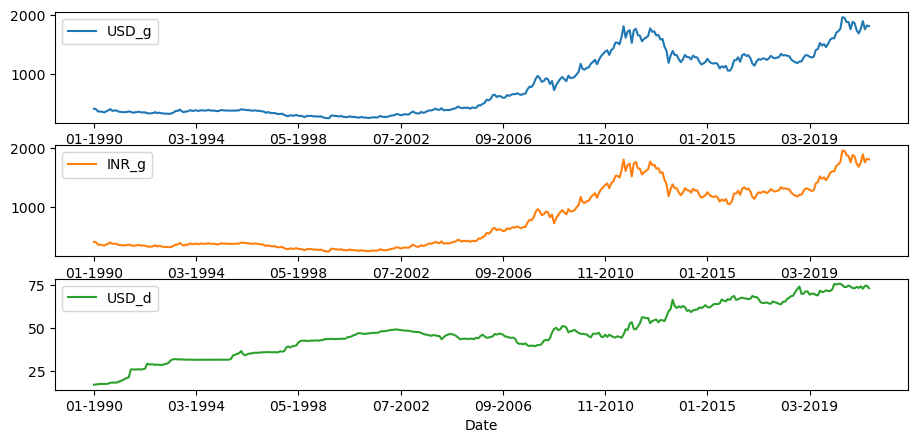

In [331]:
allprice.plot(subplots=True, sharex= False, sharey=False)
plt.show()

In [332]:
btc=pd.read_csv("Dataset/BTC.csv", usecols=["Date", "Price"])

In [333]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    135 non-null    object
 1   Price   135 non-null    object
dtypes: object(2)
memory usage: 2.2+ KB


In [334]:
btc.rename(columns = {"Price": "BTC"}, inplace=True)

In [335]:
btc

,Date,BTC
0,Oct 21,"47,575.7"
1,Sep 21,"43,823.3"
2,Aug 21,"47,130.4"
3,Jul 21,"41,553.7"
4,Jun 21,"35,026.9"
...,...,...
130,Dec 10,0.3
131,Nov 10,0.2
132,Oct 10,0.2
133,Sep 10,0.1


In [336]:
btc.Date=btc.Date.apply(lambda x: datetime.datetime.strptime(x,'%b %y').strftime('%m-%Y'))

In [337]:
btc

,Date,BTC
0,10-2021,"47,575.7"
1,09-2021,"43,823.3"
2,08-2021,"47,130.4"
3,07-2021,"41,553.7"
4,06-2021,"35,026.9"
...,...,...
130,12-2010,0.3
131,11-2010,0.2
132,10-2010,0.2
133,09-2010,0.1


In [338]:
btc.BTC=btc["BTC"].apply(lambda x: x.split(","))

In [339]:
btc.BTC=btc.BTC.apply(lambda x: "".join(x))

In [340]:
btc

,Date,BTC
0,10-2021,47575.7
1,09-2021,43823.3
2,08-2021,47130.4
3,07-2021,41553.7
4,06-2021,35026.9
...,...,...
130,12-2010,0.3
131,11-2010,0.2
132,10-2010,0.2
133,09-2010,0.1


In [341]:
btc.BTC = pd.to_numeric(btc.BTC)

In [342]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    135 non-null    object 
 1   BTC     135 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.2+ KB


In [343]:
allprice= pd.merge(allprice,btc, how="outer", on="Date")

In [344]:
allprice

,Date,USD_g,INR_g,USD_d,BTC
0,01-1990,415.1,416.628994,16.900,NaN
1,02-1990,407.7,409.261176,17.000,NaN
2,03-1990,368.5,368.279070,17.200,NaN
3,04-1990,367.8,368.743931,17.300,NaN
4,05-1990,363.1,363.900000,17.300,NaN
...,...,...,...,...,...
377,06-2021,1763.2,1763.292207,74.324,35026.9
378,07-2021,1825.8,1825.872732,74.410,41553.7
379,08-2021,1814.9,1815.136035,72.996,47130.4
380,10-2021,NaN,NaN,NaN,47575.7


In [398]:
allprice.set_index("Date", inplace=True)

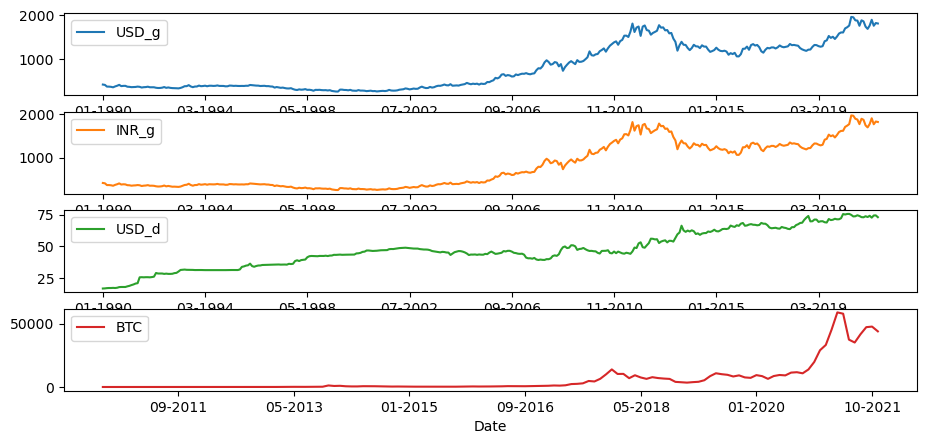

In [399]:
allprice.plot(subplots=True, sharex= False, sharey=False)
plt.show()

In [346]:
allprice.describe()

,USD_g,INR_g,USD_d,BTC
count,380.000000,380.000000,380.000000,135.000000
mean,796.234474,796.227245,47.351970,6225.451111
std,513.655220,513.559256,14.448781,12056.366724
min,254.800000,254.709197,16.900000,0.100000
25%,355.350000,354.800388,38.494500,117.500000
50%,484.500000,484.481927,45.878500,621.900000
75%,1261.775000,1260.643283,60.137500,7524.600000
max,1964.900000,1965.517255,75.563400,58763.700000


In [347]:
label = {'fontsize': 15, 'color': '#abc123', 'fontfamily': 'monospace'}

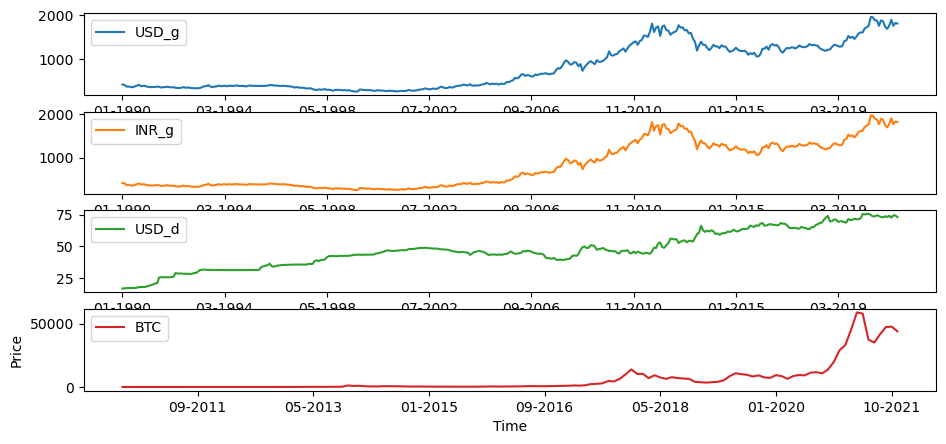

In [400]:
allprice.plot(subplots=True, sharex= False,sharey= False)
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()

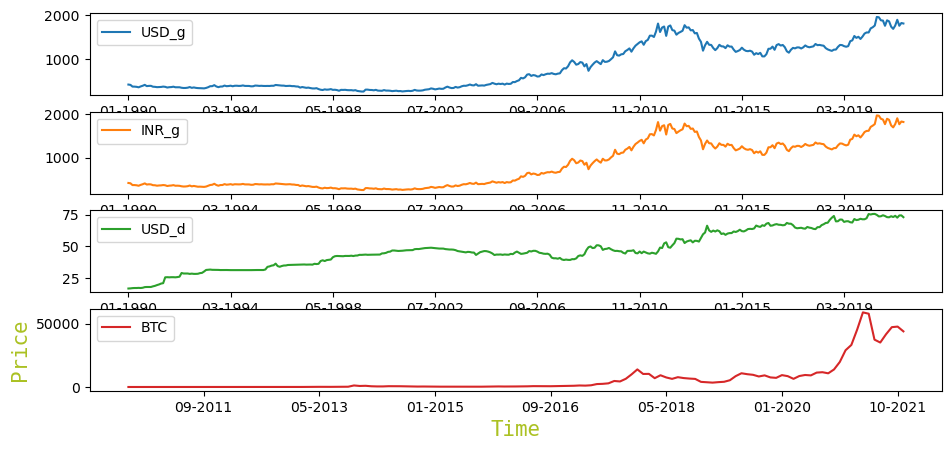

In [403]:
allprice.plot(subplots=True, sharex= False,sharey= False)
plt.xlabel("Time",fontdict = label)
plt.ylabel("Price", fontdict = label)
plt.show()

In [ ]:
allprice.INR_g

In [379]:
fc=pd.read_csv("Dataset/forecast_data.csv")